## Bike Sharing Case Study

### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. They have contracted a consulting company to understand the factoers on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes
- How well those variables describe the bike demands (priority of the variables

### Solution Approach:
- Create a linear model that describes the effect of various features on price
- interpret the model with insights for the management team

### Steps:
1. Reading, Understanding, and visualizing the Data
2. Preparing the Data for modelling
3. Building/Training the Model
4. Residual Analysis
5. Predictions and evaluation on the test set


-------------------------------------------------------------------------------------------------------

### Step 1: Reading, Understanding, and Visualizing the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

#For visualising
import matplotlib.pyplot as plt
import seaborn as sns

#splitting the data into training and test
from sklearn.model_selection import train_test_split

#rescaling of variables
from sklearn.preprocessing import MinMaxScaler

#building model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
data = pd.read_csv("day.csv")

In [3]:
# Inspect and review the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.shape

(730, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Based on the provided dataset and it's data dictionary , 'cnt' is the target variable with all the other columns as independant variable. 

#### Columns to be dropped on the initial inspection of the data.
1. 'instant' - It has a unique value for each row hence there'll be no significant insight from this column
2. 'dteday' - Information already available with other columns like 'yr', 'mnth', etc.. 
3. 'atemp' - Given we already have a column 'temp' that gives temperature data, 'atemp' is redundant.
4. 'casual' & 'registered' - as they are subsets of 'cnt' and do not add any value in terms of predicting the 'cnt'

In [7]:
#dropping the unwanted columns
data.drop(['instant', 'dteday','atemp','casual', 'registered'], axis = 1, inplace=True)

In [8]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


#### Inspecting the Data further, we see that some of the categorical variables have numerical values and as they are not orderered, we'll replace the values with their corresponding catogories as mentioned in the data dictionary. 
    - season
    - mnth
    - weekday
    - weathersit

In [9]:
#Replace values for season
data['season'] = data['season'].replace([1,2,3,4],['spring','summer','fall','winter'])

In [10]:
#Replace values for mnth
data['mnth'] = data['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])

In [11]:
#Replace values for weekday
data['weekday'] = data['weekday'].replace([0,1,2,3,4,5,6],['sun','mon','tue','wed','thu','fri','sat'])

In [12]:
#Replace values for weathersit
data['weathersit'] = data['weathersit'].replace([1,2,3,4],['clear','mist/cloudy','light snow/rain','heavy snow/rain'])

In [13]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist/cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist/cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600


### Visualizing the data to perform EDA

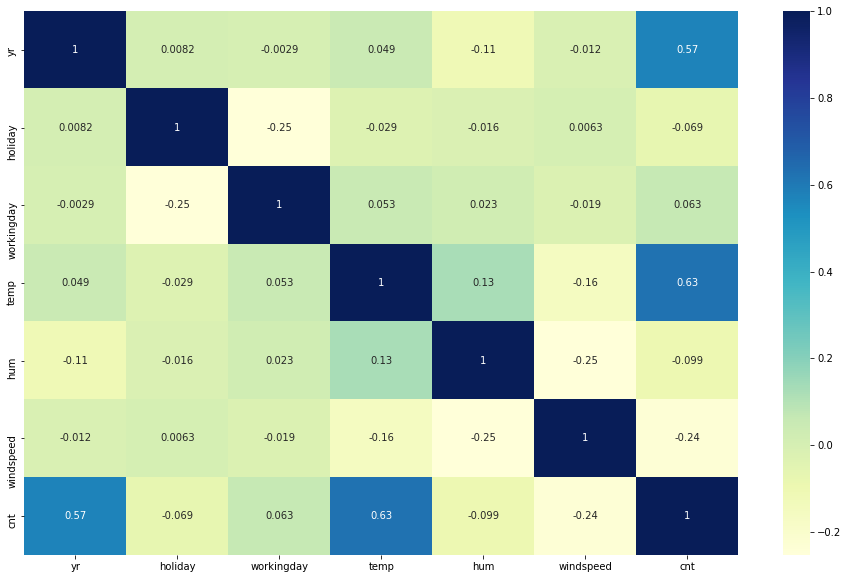

In [14]:
#heatmap to see the correlations between all the variables and identify the ones we want to keep 
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [15]:
binCols = ['yr','holiday','workingday'] #columns with binary values
nonNumCols = ['season','holiday', 'mnth', 'weekday', 'weathersit'] #columns with non-numerical values
continuousCols = ['temp','hum','windspeed'] #columns with continuous numerical values

Text(0.5, 1.0, 'Cnt distribution')

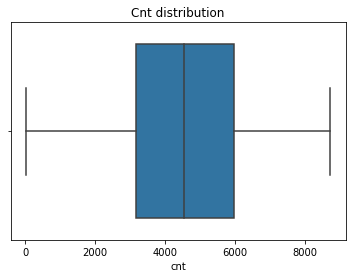

In [16]:
#checking for outliers in the target variable 'cnt'
sns.boxplot(data['cnt']).set_title('Cnt distribution')

'cnt' has a well spread distribution with no visible outliers

Text(0.5, 1.0, 'Cnt distribution across season')

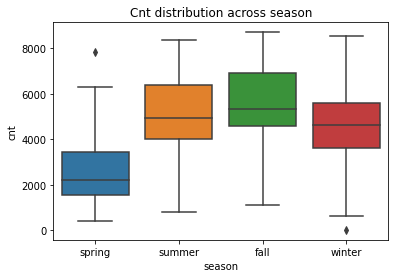

In [17]:
sns.boxplot(data['season'],data['cnt']).set_title('Cnt distribution across season')

spring has a significant drop in 'cnt' as compared to the other seasons

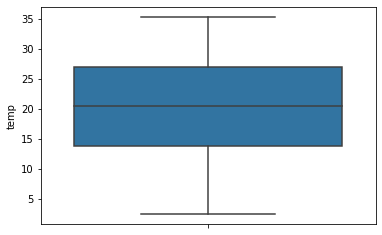

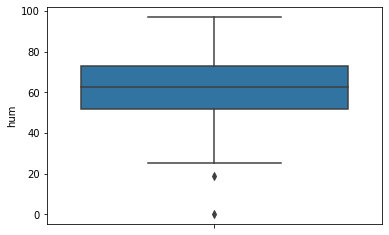

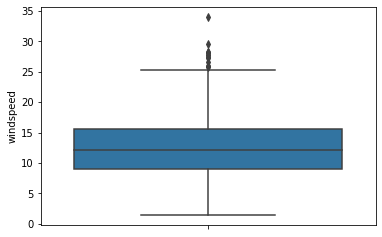

In [18]:
for col in continuousCols:
    sns.boxplot(col, data=data,orient='v') 
    plt.show()

- temp has normal distribution
- hum (humidity) has couple of outliers (can be ignored)
- windspeed has quite a few outliers

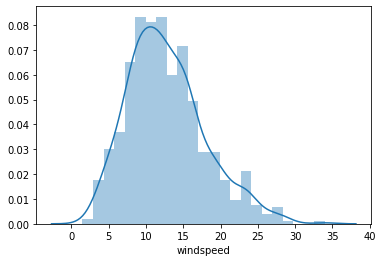

In [19]:
sns.distplot(data.windspeed)

- windspeed is still normally distributed with few outliers on the higher values which can be ignored. 

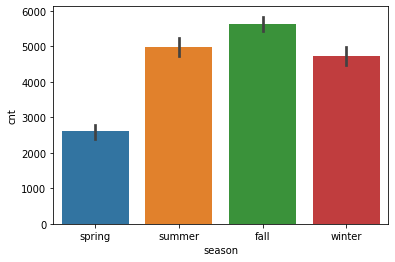

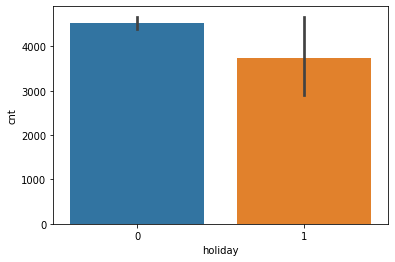

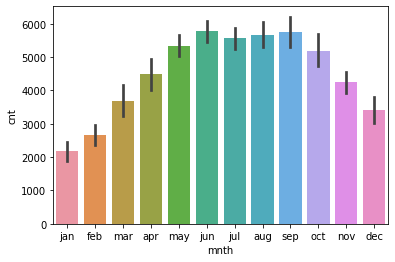

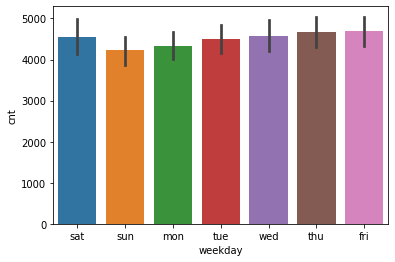

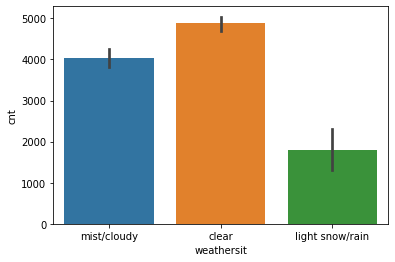

In [20]:
# bar plot for non numerical columns
for col in nonNumCols:
    sns.barplot(x=col, y='cnt', data=data)
    plt.show()


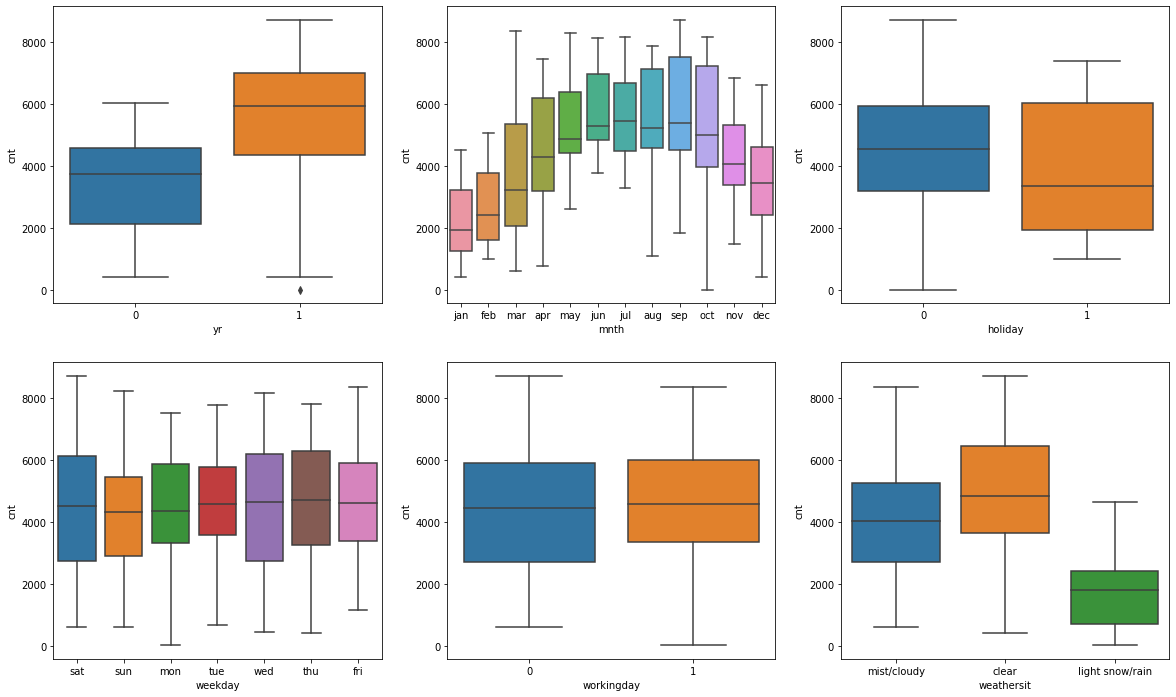

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

- Weather wise, most rentals are during summer and fall season, the same can be observed from the month wise data. 
- The rentals are almost nill on holidays
- As for the weekly patterns, there's a very slight difference on each consecutive day of the week with sunday being the lowest and saturday reaching the peak. 
- As expected the rentals are much higher on clear days as compared to cloudy days, with hardly any rentals when it's snowing or raining. 
- There has been a good year over year growth in rentals. 

### Step 2: Preparing the Data for modelling
- Create dummy variables for categorical columns
- Divide the data into train and test
- Perform scaling 
- Divide the data into X and y

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


#### Create dummy variables for categorical columns

In [23]:
# Creating dummy variables for season
seasons = pd.get_dummies(data.season)
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   fall    730 non-null    uint8
 1   spring  730 non-null    uint8
 2   summer  730 non-null    uint8
 3   winter  730 non-null    uint8
dtypes: uint8(4)
memory usage: 3.0 KB


In [24]:
# dropping a redundant dummy var
seasons = pd.get_dummies(data['season'], drop_first=True)
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   spring  730 non-null    uint8
 1   summer  730 non-null    uint8
 2   winter  730 non-null    uint8
dtypes: uint8(3)
memory usage: 2.3 KB


In [25]:
#concat the dummy df with the original one
data = pd.concat([data, seasons], axis = 1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,jan,0,sat,0,mist/cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,jan,0,sun,0,mist/cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600,1,0,0


In [26]:
#Will drop the season column as it's no longer needed
data = data.drop('season', axis = 1)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,sat,0,mist/cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,0,jan,0,sun,0,mist/cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600,1,0,0


In [27]:
#Will repeat the above steps of creating dummies, concatenating the dataframes 
#and deleting the column for 'mnth', 'weekday' and 'weathersit'

#mnth
months = pd.get_dummies(data['mnth'], drop_first=True)
data = pd.concat([data, months], axis = 1)
data = data.drop('mnth', axis = 1)

#weekday
weekdays = pd.get_dummies(data['weekday'], drop_first=True)
data = pd.concat([data, weekdays], axis = 1)
data = data.drop('weekday', axis = 1)

#weathersit
weather = pd.get_dummies(data['weathersit'], drop_first=True)
data = pd.concat([data, weather], axis = 1)
data = data.drop('weathersit', axis = 1)

data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow/rain,mist/cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Splitting the Data into Training and Testing Sets

In [28]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow/rain,mist/cloudy
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


#### Rescaling the Features
We will use MinMax scaling.

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
# Apply scaler() to all the columns except the ones that are already binary and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow/rain,mist/cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


#### Dividing into X and Y sets for the model building

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train

### Step 3: Building/Training the Linear Regression Model 
We'll first use RFE (Recursive Feature Elimination) and then further perform manual method to reduce the variables. 

#### RFE method

In [33]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 6),
 ('thu', False, 11),
 ('tue', False, 9),
 ('wed', False, 12),
 ('light snow/rain', True, 1),
 ('mist/cloudy', True, 1)]

In [36]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jan', 'jul', 'sep', 'sat', 'light snow/rain',
       'mist/cloudy'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon', 'sun',
       'thu', 'tue', 'wed'],
      dtype='object')

#### Building the model manually using statsmodel

In [38]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,jan,jul,sep,sat,light snow/rain,mist/cloudy
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1


In [39]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.31e-191
Time:                        23:02:16   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2510      0.036     

##### From the summary above, all the variables have a p-value < 0.05, which indicates they all are pretty significant. So we'll look at their VIF (Variance Inflation Factor) scores, to see if there is any multi-collinearity here.

In [40]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
14,mist/cloudy,2.29
0,yr,2.09
12,sat,1.98


- Here we see hum(humidity) has a very high VIF so we'll drop and rerun the model.

The common guidance we follow for VIF values are:
- VIF > 10: Definitely high, variable should be eliminated
- VIF > 5: Can be okay, but worth inspecting
- VIF < 5: Good VIF value, no need to eliminate

In [41]:
# drop hum
X_train_rfe = X_train_rfe.drop('hum', axis = 1)

In [42]:
# Rebuilding the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          7.33e-189
Time:                        23:02:16   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1737      0.031     

In [43]:
#Calculating the VIF
vif = pd.DataFrame()
X = X_train_rfe
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,yr,2.08
7,winter,1.99
11,sat,1.97
8,jan,1.62
9,jul,1.59


- Now we see 'temp' having a VIF > 5, so we'll drop and rebuild the model

In [44]:
# drop temp
X_train_rfe = X_train_rfe.drop('temp', axis = 1)

In [45]:
# Rebuilding the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.04e-154
Time:                        23:02:16   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5448      0.020     

In [46]:
#Calculating the VIF
vif = pd.DataFrame()
X = X_train_rfe
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,spring,2.97
5,summer,2.27
6,winter,1.99
0,yr,1.91
10,sat,1.69
7,jan,1.60
12,mist/cloudy,1.56
8,jul,1.30


- Now the VIF of all the variables are under 5, but we see that the variable 'jul' has a p-value of 0.645 which is way higher than the limit of 0.05, so we'll drop that next and rebuild the model.

In [47]:
# drop holiday
X_train_rfe = X_train_rfe.drop('holiday', axis = 1)

In [48]:
# Rebuilding the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.5
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.54e-154
Time:                        23:02:16   Log-Likelihood:                 424.11
No. Observations:                 510   AIC:                            -822.2
Df Residuals:                     497   BIC:                            -767.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5368      0.020     

In [49]:
#Calculating the VIF
vif = pd.DataFrame()
X = X_train_rfe
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.21
1,workingday,3.54
3,spring,2.92
4,summer,2.25
5,winter,1.92
0,yr,1.91
9,sat,1.62
6,jan,1.60
11,mist/cloudy,1.56
7,jul,1.29


- Interestingly now we have both the VIF and p-value of the variables under the expected threshold of 5 and 0.05 respectively, however, the R-squared and the Adj. R-squared have both fallen under 78%. 
- To improve these scores, we'll bring back the 'temp' variable as we did see significant correlation between temperature and rentals 'cnt'

In [50]:
#concat the temp column with the X_train_rfe
X_train_new = pd.concat([X_train_rfe, X_train.temp], axis = 1)
X_train_new.head()

,const,yr,workingday,windspeed,spring,summer,winter,jan,jul,sep,sat,light snow/rain,mist/cloudy,temp
653,1.0,1,1,0.300794,0,0,1,0,0,0,0,0,0,0.509887
576,1.0,1,1,0.264686,0,0,0,0,1,0,0,0,0,0.815169
426,1.0,1,0,0.255342,1,0,0,0,0,0,1,0,1,0.442393
728,1.0,1,0,0.663106,1,0,0,0,0,0,0,0,0,0.245101
482,1.0,1,0,0.188475,0,1,0,0,0,0,1,0,1,0.395666


In [51]:
# Rebuilding the linear model
lm = sm.OLS(y_train,X_train_new).fit()   

#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.11e-189
Time:                        23:02:17   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1656      0.031     

In [52]:
#Calculating the VIF
vif = pd.DataFrame()
X = X_train_new
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,6.82
1,workingday,4.68
2,windspeed,4.66
3,spring,2.99
4,summer,2.31
0,yr,2.08
5,winter,1.92
9,sat,1.84
6,jan,1.62
7,jul,1.59


- Now the model has both the R-Squared and Adj. R-squared score of 0.83+ which is great
- None of the variables have a p-value of > 0.05
- temp does have a VIF of 5.53 which is just above the cut off of 5 but given it's signifance, we'll keep it in the model. 

### Step 4: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [53]:
y_train_cnt = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

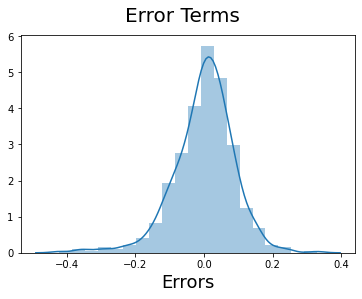

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### we see above that the error terms are normally distributed and has a mean of 0, matching the conditions required

## Step 5: predictions and Evaluation of the Test Set
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [56]:
# Apply scaler() to all the columns except the ones that are already binary and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow/rain,mist/cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [57]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light snow/rain,mist/cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [59]:
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test)

In [66]:
col1 = X_train_new.columns
col1

Index(['const', 'yr', 'workingday', 'windspeed', 'spring', 'summer', 'winter',
       'jan', 'jul', 'sep', 'sat', 'light snow/rain', 'mist/cloudy', 'temp'],
      dtype='object')

In [68]:
# matching the variables of X_train_new to X_test_new

X_test_new = X_test_new[col1]

In [69]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            219 non-null    float64
 1   yr               219 non-null    int64  
 2   workingday       219 non-null    int64  
 3   windspeed        219 non-null    float64
 4   spring           219 non-null    uint8  
 5   summer           219 non-null    uint8  
 6   winter           219 non-null    uint8  
 7   jan              219 non-null    uint8  
 8   jul              219 non-null    uint8  
 9   sep              219 non-null    uint8  
 10  sat              219 non-null    uint8  
 11  light snow/rain  219 non-null    uint8  
 12  mist/cloudy      219 non-null    uint8  
 13  temp             219 non-null    float64
dtypes: float64(3), int64(2), uint8(9)
memory usage: 12.2 KB


In [70]:
# Making predictions using the final model

y_pred_new = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

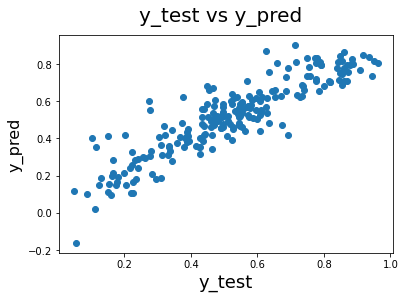

In [71]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_new)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

We can see that the equation of our best fitted line is:

$ cnt = 0.46  \times  temp + 0.23  \times  yr + 0.09 \times winter + 0.086 \times sep + 0.067 \times sat + 0.057 \times summer + 0.055 \times workingday - 0.041 \times jan - 0.049 \times spring - 0.08 \times mist/cloud - 0.0157 \times windspeed - 0.029 \times lightsnow/rain $